In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder

from nltk.corpus import stopwords

from wordcloud import WordCloud

import string

import plotly.express as px

from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import seaborn as sns
import nltk

from collections import Counter

nltk.download('punkt')



from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer


from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

from sklearn.model_selection import train_test_split


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
stop_words = {'a','about','above','after','again','against','ain','all','am','an','and','any','are','aren',"aren't",'as','at','be','because','been','before','being','below','between','both','but','by','can','couldn',"couldn't",'d','did','didn',"didn't",'do','does','doesn',"doesn't",'doing','don',"don't",'down','during','each','few','for','from','further','had','hadn',"hadn't",'has','hasn',"hasn't",'have','haven',"haven't",'having','he','her','here','hers','herself','him','himself','his','how','i','if','in','into','is','isn',"isn't",'it',"it's",'its','itself','just','ll','m','ma','me','mightn',"mightn't",'more','most','mustn',"mustn't",'my','myself','needn',"needn't",'no','nor','not','now','o','of','off','on','once','only','or','other','our','ours','ourselves','out','over','own','re','s','same','shan',"shan't",'she',"she's",'should',"should've",'shouldn',"shouldn't",'so','some','such','t','than','that',"that'll",'the','their','theirs','them','themselves','then','there','these','they','this','those','through','to','too','under','until','up','ve','very','was','wasn',"wasn't",'we','were','weren',"weren't",'what','when','where','which','while','who','whom','why','will','with','won',"won't",'wouldn',"wouldn't",'y','you',"you'd","you'll","you're","you've",'your','yours','yourself','yourselves'}

In [4]:
df = pd.read_json('final.json')

In [5]:
df.head()

,Body,Label
0,\nSave up to 70% on Life Insurance.\nWhy Spend...,1
1,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
2,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
3,##############################################...,1
4,I thought you might like these:\n1) Slim Down ...,1


In [6]:
df.shape

(18016, 2)

In [7]:
df.duplicated().sum()

544

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.shape

(17472, 2)

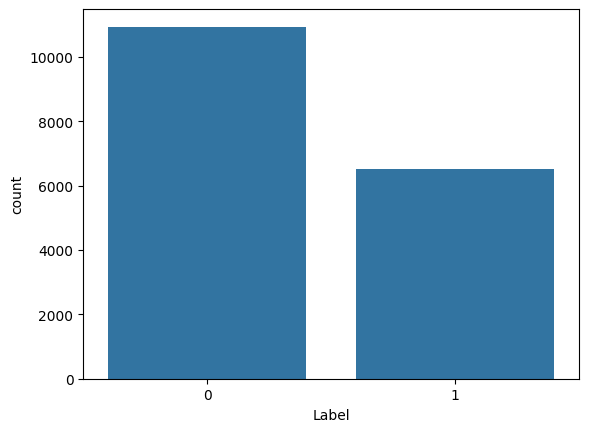

In [10]:
gfg = sns.countplot(x = 'Label', data= df)

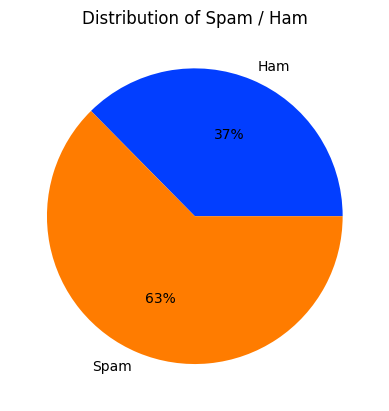

In [11]:
palette_color = sns.color_palette('bright')
plt.pie(Counter(df.Label).values(), labels=['Ham','Spam'], colors=palette_color, autopct='%.0f%%',)
plt.title('Distribution of Spam / Ham')
plt.show()

In [12]:
print(df.iloc[6,:]['Body'])

Help wanted.  We are a 14 year old fortune 500 company, that is
growing at a tremendous rate.  We are looking for individuals who
want to work from home.This is an opportunity to make an excellent income.  No experience
is required.  We will train you.So if you are looking to be employed from home with a career that has
vast opportunities, then go:http://www.basetel.com/wealthnowWe are looking for energetic and self motivated people.  If that is you
than click on the link and fill out the form, and one of our
employement specialist will contact you.To be removed from our link simple go to:http://www.basetel.com/remove.html
4139vOLW7-758DoDY1425FRhM1-764SMFc8513fCsLl40


In [13]:
import sys
!{sys.executable} -m pip install contractions

In [14]:
#initialize the prter stemmer
import contractions
from nltk.stem.wordnet import WordNetLemmatizer
wordnet = WordNetLemmatizer()


In [15]:
import re
def basic_clean(x) :
    x = re.sub(r"\n"," ",x)
    x = re.sub(r"Subject:","",x)
    x = re.sub(r"Subject:","",x)
    x = re.sub(r"http\S+","",x)
    x = re.sub(r"www\S+","",x)
    x = re.sub('[^A-Za-z0-9]+',' ',x)

    x = x.lower()
    x = [contractions.fix(wordnet.lemmatize(word)) for word in x.split() if word not in stop_words]
    x = ' '.join(x)

    return x






In [16]:
!pip install nltk
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [17]:
df['clean_text'] = df['Body'].apply(lambda x : basic_clean(str(x)))

In [18]:
df.head()

,Body,Label,clean_text
0,\nSave up to 70% on Life Insurance.\nWhy Spend...,1,save 70 life insurance spend life quote saving...
1,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1,1 fight risk cancer slim guaranteed lose 10 12...
2,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1,1 fight risk cancer slim guaranteed lose 10 12...
3,##############################################...,1,adult club offer free membership instant acces...
4,I thought you might like these:\n1) Slim Down ...,1,thought might like 1 slim guaranteed lose 10 1...


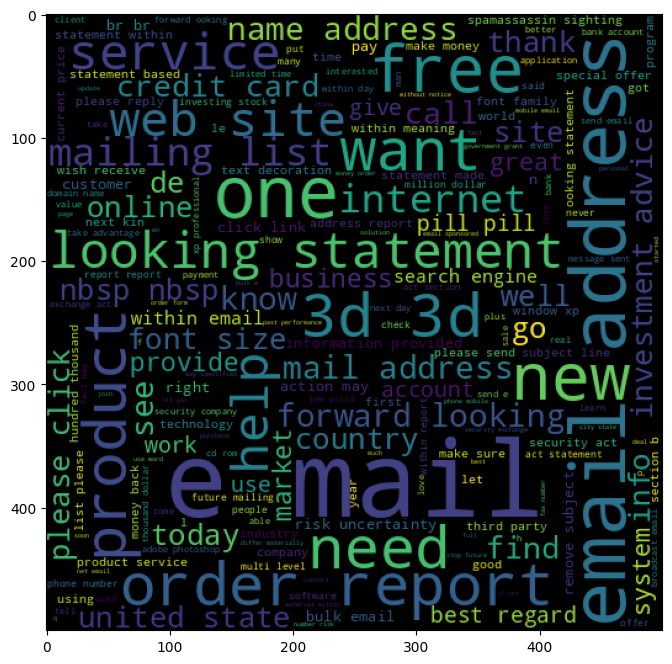

In [19]:
body = ''.join(df[df['Label'] == 1]['clean_text'])
wc = WordCloud(width = 500 , height = 500).generate(body)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc)

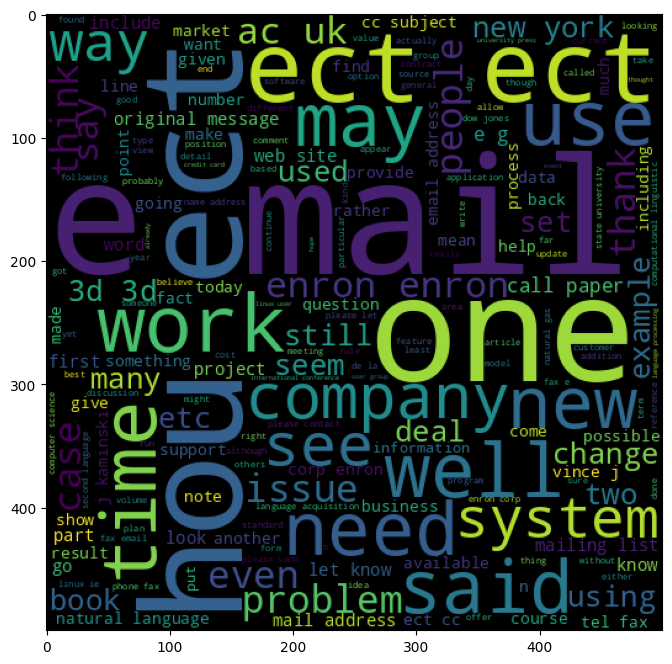

In [20]:
body = ''.join(df[df['Label'] == 0]['clean_text'])

wc = WordCloud(width = 500 , height = 500).generate(body)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc)

In [21]:
spam_corpus = []

for msg in df[df.Label == 1]['clean_text'].tolist():
    for word in msg.split():

        spam_corpus.append(word)

gem_corpus = []

for msg in df[df.Label == 0]['clean_text'].tolist():
    for word in msg.split():

        gem_corpus.append(word)

In [22]:
len(spam_corpus) , len(gem_corpus)

(1045661, 3692197)

In [23]:
spam_30 = Counter(spam_corpus).most_common(30)
gem_30 = Counter(gem_corpus).most_common(30)


In [24]:

spam_keys = []
spam_values = []
for item in spam_30:
    spam_keys.append(item[0])
    spam_values.append(item[1])


In [25]:

gem_keys = []
gem_values = []
for item in gem_30:
    gem_keys.append(item[0])
    gem_values.append(item[1])



<ipython-input-26-242c7971f9a2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y = spam_keys,x = spam_values, palette= palette_color)
<ipython-input-26-242c7971f9a2>:2: UserWarning: 
The palette list has fewer values (10) than needed (30) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(y = spam_keys,x = spam_values, palette= palette_color)


<Axes: >

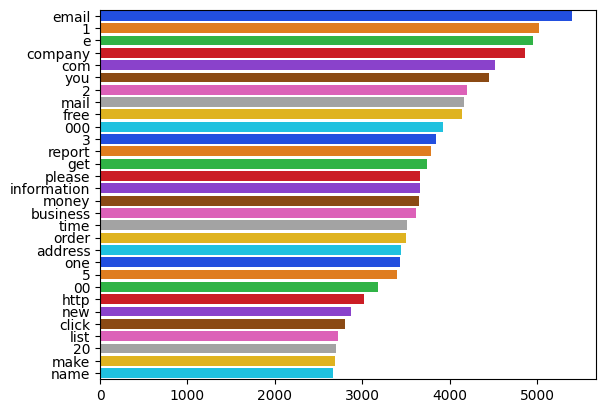

In [26]:
palette_color = sns.color_palette('bright')
sns.barplot(y = spam_keys,x = spam_values, palette= palette_color)

<ipython-input-27-ee282314f727>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y = gem_keys,x = gem_values, palette= palette_color)
<ipython-input-27-ee282314f727>:2: UserWarning: 
The palette list has fewer values (10) than needed (30) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(y = gem_keys,x = gem_values, palette= palette_color)


<Axes: >

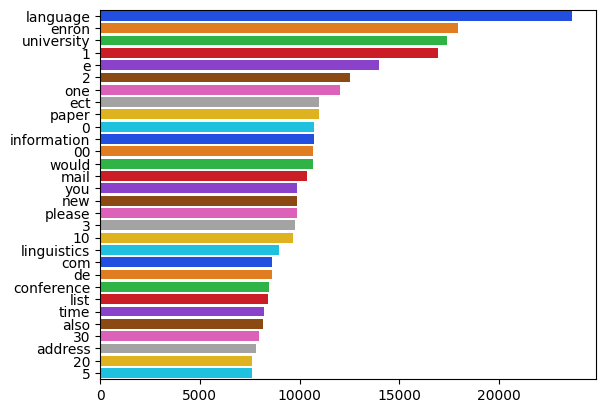

In [27]:
palette_color = sns.color_palette('bright')
sns.barplot(y = gem_keys,x = gem_values, palette= palette_color)

In [29]:
df['words'] = df['clean_text'].apply(lambda x : (word_tokenize(str(x))))

In [30]:
df.head()

,Body,Label,clean_text,words
0,\nSave up to 70% on Life Insurance.\nWhy Spend...,1,save 70 life insurance spend life quote saving...,"[save, 70, life, insurance, spend, life, quote..."
1,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1,1 fight risk cancer slim guaranteed lose 10 12...,"[1, fight, risk, cancer, slim, guaranteed, los..."
2,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1,1 fight risk cancer slim guaranteed lose 10 12...,"[1, fight, risk, cancer, slim, guaranteed, los..."
3,##############################################...,1,adult club offer free membership instant acces...,"[adult, club, offer, free, membership, instant..."
4,I thought you might like these:\n1) Slim Down ...,1,thought might like 1 slim guaranteed lose 10 1...,"[thought, might, like, 1, slim, guaranteed, lo..."


In [31]:
df['words'].describe()

count                     17472
unique                    17321
top       [url, date, supplied]
freq                         10
Name: words, dtype: object

In [32]:
px.histogram(df, x='words',color = 'Label',category_orders={"Label": ["Spam", "Ham"]})


In [33]:
count_vect = CountVectorizer(max_features = 3000)
tfidf_transformer = TfidfTransformer()



pipe = Pipeline([('count', count_vect),
    ('tfid', TfidfTransformer())]).fit(df['clean_text'])



In [34]:
X = df['clean_text']
y = df.Label


corpus_vector = pipe.transform(X).toarray()
#corpus_vector = tfidf.fit_transform(X).toarray()


X_train,X_test,y_train,y_test = train_test_split(corpus_vector,y,test_size=0.3,random_state=2)


In [35]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
mnb.fit(X_train,y_train)
y_pred1 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9641358260206028
[[3212   86]
 [ 102 1842]]
0.9553941908713693


In [36]:
gnb = GaussianNB()

gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9078595955742084
[[2932  366]
 [ 117 1827]]
0.8331053351573188


In [37]:
bnb = BernoulliNB()

bnb.fit(X_train,y_train)
y_pred1 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8910721098817246
[[2758  540]
 [  31 1913]]
0.77986139421117


In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [39]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2,verbosity = 0)

In [40]:
def train_classifer(clf,X_train,y_train,X_test,y_test):

    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision


In [41]:
train_classifer(knc,X_train,y_train,X_test,y_test)

(0.549790156428844, 0.45144724556489263)

In [42]:
clfs ={
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [ ]:
accuracy_scores = []
precision_scores = []

for name , clf in clfs.items():

    current_accuracy , current_precision = train_classifer(clf,X_train,y_train,X_test,y_test)

    print("For :", name)
    print("Accuracy : " , current_accuracy)
    print("Precision : ",current_precision,end = '\n\n')
    #print("Precision : ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)



For : SVC
Accuracy :  0.9727203357497138
Precision :  0.960613810741688

For : KN
Accuracy :  0.549790156428844
Precision :  0.45144724556489263

For : NB
Accuracy :  0.9641358260206028
Precision :  0.9553941908713693

For : DT
Accuracy :  0.8143838229683327
Precision :  0.8431095406360424

For : LR
Accuracy :  0.9654711942006867
Precision :  0.9513568868407578

For : RF
Accuracy :  0.9681419305608546
Precision :  0.9521628498727736

For : AdaBoost
Accuracy :  0.9238840137352156
Precision :  0.8621659634317862



In [ ]:
performance = pd.DataFrame({
    'Algorithm' : clfs.keys() ,
    'Accuracy' : accuracy_scores ,
    'Precision' : precision_scores
}).sort_values(['Precision','Accuracy'],ascending = False)

In [ ]:
performance

In [ ]:
import pickle
pickle.dump(pipe,open('pipe.pkl','wb'))
pickle.dump(rfc,open('rfc.pkl','wb'))

In [ ]:
input_sms = "Get your free sample today, Send a message on 8797688079 to claim"

In [ ]:
# 1. preprocess
transformed_sms = basic_clean(input_sms)
print(transformed_sms)
# 2. vectorize
vector_input = pipe.transform([transformed_sms])
# 3. predict
result = etc.predict(vector_input)[0]
print(result)
